# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [26]:
os.getcwd()

'/Users/caro/Fintech-projects/HW12-NLP/Homework/Instructions/Starter_Code'

In [27]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/caro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")


In [29]:
news_api_key

'76aaefa6e7ca44deacb2b1075b675dd9'

In [30]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [31]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="bitcoin", sort_by="relevancy", language="en")

print(f"Total articles regading Bitcoin: {btc_articles['totalResults']}")

Total articles regading Bitcoin: 7368


In [32]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything (q="ethereum", sort_by="relevancy", language="en")

print(f"Total articles regading Ethereum: {eth_articles['totalResults']}")

Total articles regading Ethereum: 2239


In [33]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
btc_df

,text,compound,positive,negative,neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
5,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.000,0.873
6,A representation of virtual currency Bitcoin i...,0.0000,0.000,0.000,1.000
7,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000
8,James Martin/CNET\r\nA UK man was arrested in ...,-0.4767,0.000,0.088,0.912
9,A representations of virtual currency Bitcoin ...,0.0000,0.000,0.000,1.000


In [34]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
eth_df

,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806
5,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850
6,This article was translated from our Spanish e...,-0.3400,0.000,0.072,0.928
7,Major upgrades to the ethereum network could h...,0.4019,0.080,0.000,0.920
8,While the ambitions of crypto investors have s...,0.0000,0.000,0.000,1.000
9,Personal Finance Insider writes about products...,0.5346,0.158,0.000,0.842


In [35]:
# Describe the Bitcoin Sentiment
btc_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.003760,0.048800,0.047550,0.903650
std,0.468374,0.062971,0.092109,0.111788
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.119175,0.000000,0.000000,0.851750
50%,0.000000,0.000000,0.000000,0.915500
75%,0.297600,0.096000,0.022000,1.000000
max,0.726400,0.178000,0.287000,1.000000


In [36]:
# Describe the Ethereum Sentiment
eth_df.describe()



,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.242775,0.068000,0.012450,0.919550
std,0.316585,0.074558,0.026172,0.082982
min,-0.340000,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.125000,0.037500,0.000000,0.926500
75%,0.528675,0.149250,0.000000,1.000000
max,0.771700,0.194000,0.072000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [37]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [42]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw_list = stopwords.words('english')

# Expand the default stopwords list if necessary
#Remove the char word.
sw_list.append('char')

sw = set(sw_list)

In [43]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
        
    
    return tokens

In [44]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for text in btc_df['text']:
    article = text
    
    btc_tokens.append(tokenizer(article))
    
btc_df['tokens'] = btc_tokens

btc_df

,text,compound,positive,negative,neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
5,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.000,0.873,"[longtime, techcrunch, reader, know, well, mic..."
6,A representation of virtual currency Bitcoin i...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, bitcoin, s..."
7,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representations, b..."
8,James Martin/CNET\r\nA UK man was arrested in ...,-0.4767,0.000,0.088,0.912,"[james, martincneta, uk, man, wa, arrested, sp..."
9,A representations of virtual currency Bitcoin ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, bitcoin, s..."


In [45]:
# Create a new tokens column for Ethereum
eth_tokens = []

for text in eth_df['text']:
    article = text
    
    eth_tokens.append(tokenizer(article))
    
eth_df['tokens'] = eth_tokens

eth_df

,text,compound,positive,negative,neutral,tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."
5,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850,"[ether, cryptocurrency, ethereum, networkphoto..."
6,This article was translated from our Spanish e...,-0.3400,0.000,0.072,0.928,"[article, wa, translated, spanish, edition, us..."
7,Major upgrades to the ethereum network could h...,0.4019,0.080,0.000,0.920,"[major, upgrade, ethereum, network, could, hel..."
8,While the ambitions of crypto investors have s...,0.0000,0.000,0.000,1.000,"[ambition, crypto, investor, swelled, even, fa..."
9,Personal Finance Insider writes about products...,0.5346,0.158,0.000,0.842,"[personal, finance, insider, writes, product, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [46]:
from collections import Counter
from nltk import ngrams

In [66]:
# Generate the Bitcoin N-grams where N=2
btc_big_list = [item for sublist in btc_tokens for item in sublist]

btc_ngrams = ngrams(btc_big_list, n=2)

In [75]:
# Generate the Ethereum N-grams where N=2
eth_big_list = [item for sublist in eth_tokens for item in sublist]
eth_ngrams = ngrams(eth_big_list, n=2)


In [68]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [69]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngrams, 10)


[(('virtual', 'currency'), 5),
 (('currency', 'bitcoin'), 5),
 (('bitcoin', 'seen'), 5),
 (('seen', 'front'), 5),
 (('illustration', 'taken'), 5),
 (('representation', 'virtual'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('attack', 'ha'), 2)]

In [70]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngrams, 10)


[(('bitcoin', 'ethereum'), 4),
 (('ethereum', 'network'), 4),
 (('cryptocurrency', 'ethereum'), 4),
 (('taken', 'june'), 4),
 (('illustration', 'taken'), 4),
 (('cryptocurrencies', 'bitcoin'), 3),
 (('ethereum', 'dogecoin'), 3),
 (('holder', 'staked'), 2),
 (('staked', 'billion'), 2),
 (('billion', 'worth'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

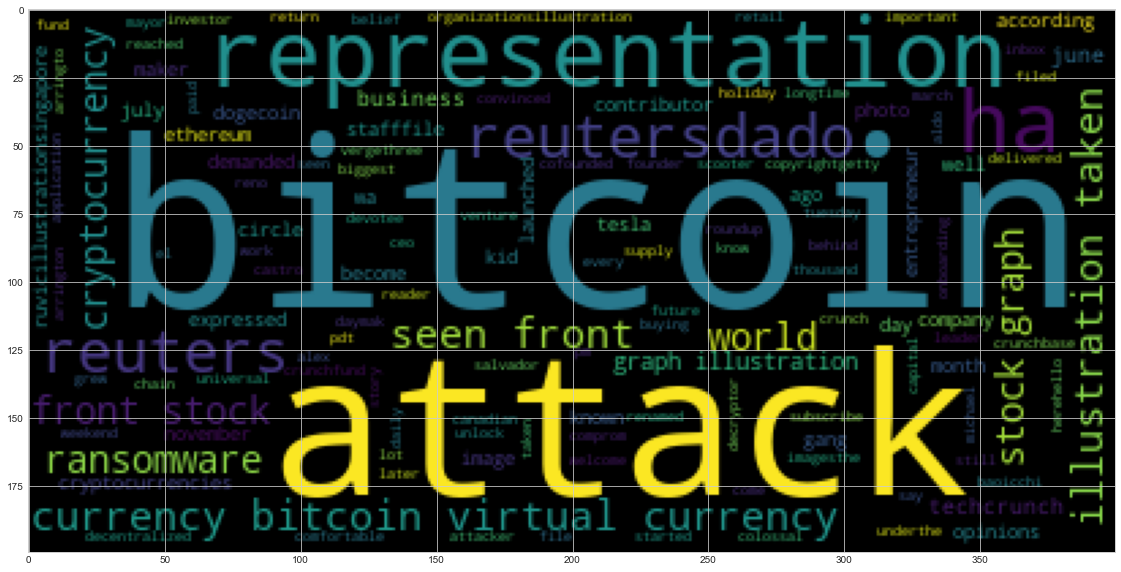

In [77]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_big_list)
wc = WordCloud().generate(btc_big_string)
plt.imshow(wc)

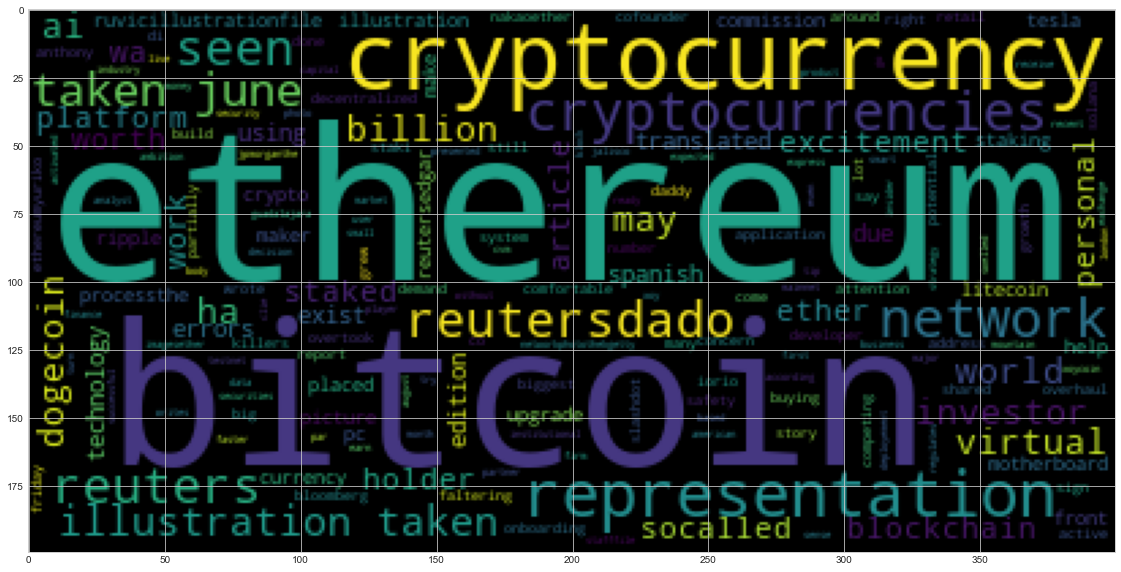

In [78]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(eth_big_list)
wc = WordCloud().generate(eth_big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [79]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [80]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [86]:
# Concatenate all of the Bitcoin text together
btc_concat = ' '.join(btc_df['text'])

In [96]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)


# Add a title to the document
btc_doc.user_data["title"] = "Newsapi Bitcoin NER"



In [97]:
# Render the visualization
displacy.render(btc_doc, style='ent')



In [89]:
# List all Entities
print([ent.text for ent in btc_doc.ents])


['Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'Alex Castro', 'The Verge', 'Three days', 'the holiday weekend', 'copyrightGetty Images', '$70m', '£50.5m', 'every day', '3 p.m. PDT', 'Daily Crunch', 'July 23, 2021', 'Bitcoin and Ethereum', '2021', 'Michael Arrington', 'TechCrunch', 'Crunchbase', 'CrunchFund', 'Tuesday', '2017', 'March 15, 2021', 'REUTERS', 'Dado Ruvic/', 'June 30', 'Reuters', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration/File Photo', 'Reuters', '+304', 'James Martin/CNET', 'UK', 'Spain', 'Twitter', '2020', 'the US Department of Justi', 'May 19, 2021', 'REUTERS', 'Dado Ruvic', 'Reuters', '5.17%', '33', 'November 19, 2020', 'REUTERS', 'Dado Ruvic/IllustrationSINGAPORE', 'July 21', 'Reuters', 'Reuters', 'FILE', 'November 19, 2020', 'REUTERS', 'Dado Ruvic/Illustration\r\nSINGAPORE', 'June 29, 2021', 'REUTERS', 'Dado Ruvic', 'Ju', 'Entrepreneur', 'Crypto Kids Camp', 'Los Angeles', 'CNBC', '26', 'five to 17', 'Entrepreneur', 'first', 'mo

---

### Ethereum NER

In [90]:
# Concatenate all of the Ethereum text together
eth_concat = ' '.join(eth_df['text'])


In [94]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)

# Add a title to the document
eth_doc.user_data["title"] = "Newsapi Ethereum NER"


In [95]:
# Render the visualization
displacy.render(eth_doc, style='ent')


In [93]:
# List all Entities
print([ent.text for ent in eth_doc.ents])


['Ethereum', 'Ethereum Killers', 'Solana', 'Bitcoin and Ethereum', '2021', 'Yuriko Nakao', 'Friday', 'Anthony Di Iorio', 'Ethereum', 'Bloomberg', 'Slashdot', 'more than $13 billion', '2.0', 'Photothek', 'more than $13 billion', '2.0', 'Spanish', 'AI', 'Xoy Capital', 'Guadalajara', 'Jalisco', 'Xoycoin', '$40 billion', '2025', 'JPMorgan', 'recent months', 'American Express', 'Spanish', 'AI', 'The Securities and Exchange Commission', 'London', 'Ethereum', '12 965 000', 'August 3-5, 2021', 'Clie', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration/File Photo', 'Reuters', '+304', 'Hackaday', 'Proof of Work', 'Bitcoin, Ethereum', 'May 19, 2021', 'REUTERS', 'Dado Ruvic', 'Reuters', '5.17%', '33', 'Polygon', '$100 million', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File Photo', 'February 9, 2021', 'REUTERS', 'Dado', 'Reuters', 'Tesla Inc', 'Reuters', 'Ethereum', 'June 14, 2021', 'REUTERS', 'Edgar Su/Il', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File']


---